In [1]:
!pip install opencv-python


In [2]:
import cv2
import numpy as np



In [3]:
%%cmd
where python

Microsoft Windows [Version 10.0.22631.4751]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\91966>where python
C:\Users\91966\anaconda3\python.exe
C:\Users\91966\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\91966\AppData\Local\Microsoft\WindowsApps\python.exe

(base) C:\Users\91966>

In [4]:
%%cmd
pip install cmake

Microsoft Windows [Version 10.0.22631.4751]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\91966>pip install cmake

(base) C:\Users\91966>

In [5]:
%%cmd
python --version

Microsoft Windows [Version 10.0.22631.4751]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\91966>python --version
Python 3.12.4

(base) C:\Users\91966>

In [6]:
%%cmd
pip install "C:\Users\91966\Desktop\DLIP\dlib-19.24.99-cp312-cp312-win_amd64.whl"

Microsoft Windows [Version 10.0.22631.4751]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\91966>pip install "C:\Users\91966\Desktop\DLIP\dlib-19.24.99-cp312-cp312-win_amd64.whl"
Processing c:\users\91966\desktop\dlip\dlib-19.24.99-cp312-cp312-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.

(base) C:\Users\91966>

In [7]:
%%cmd
pip install face-recognition

Microsoft Windows [Version 10.0.22631.4751]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\91966>pip install face-recognition

(base) C:\Users\91966>

In [8]:
%%cmd
pip install matplotlib.pyplot 

Microsoft Windows [Version 10.0.22631.4751]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\91966>pip install matplotlib.pyplot 


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot



(base) C:\Users\91966>

In [9]:
import face_recognition as fr

In [10]:
import matplotlib.pyplot as plt
from IPython.display import clear_output  # To clear the output in Jupyter Notebook

In [11]:
video_capture = cv2.VideoCapture(0)

In [12]:
image = fr.load_image_file(r"C:\Users\91966\Videos\New folder\IMG.jpeg")

In [13]:
image_face_encoding = fr.face_encodings(image)[0]

In [14]:
known_face_encoding =[image_face_encoding]

In [15]:
known_face_names = ["Aravind"]

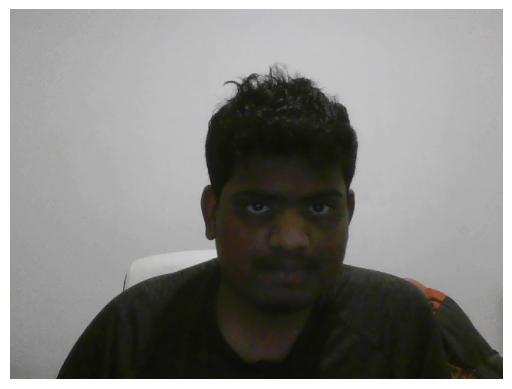

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [16]:
try:
    while True:
        ret, frame = video_capture.read() 

        # Convert the frame from BGR to RGB (face_recognition uses RGB)
        rgb_frame = frame[:, :, ::-1]

        # Detect face locations and encodings
        fc_locations = fr.face_locations(rgb_frame)
        fc_encodings = fr.face_encodings(rgb_frame, fc_locations)

        # Loop through each face found in the frame
        for (top, right, bottom, left), face_encoding in zip(fc_locations, fc_encodings):
            # Compare the face with known faces
            matches = fr.compare_faces(known_face_encodings, face_encoding)
            name = "unknown"

            # Find the best match
            fc_distances = fr.face_distances(known_face_encodings, face_encoding)
            match_index = np.argmin(fc_distances)

            if matches[match_index]:
                name = known_face_names[match_index]

            # Draw a rectangle around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

            # Draw a label with the name below the face
            cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

        # Display the frame using matplotlib
        clear_output(wait=True)  # Clear the previous output
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Add a small delay to allow the plot to update
        plt.pause(0.001)

except KeyboardInterrupt:
    # Stop the loop when the user interrupts the kernel
    print("Video capture stopped.")

finally:
    # Release the video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()